In [1]:
############### Load Necessary Libraries ################ 
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import OneHotEncoder
from matplotlib.ticker import PercentFormatter

import json
warnings.filterwarnings('ignore')                    # Turn the warnings off.


Correlation Between Features:
 AxesSubplot(0.125,0.125;0.62x0.755) 

Distribution of our Data:
 count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64 

Mean Squared Error of SVR Model: 0.15342032335910932
R^2 Score of SVR Mode 0.8146221226150155
Accuracy of SVR Model=0.8612420087407827 

Mean Squared Error of Ridge Model= 0.23444112015108126
R^2 Score of Ridge Model= 0.71672464068767
Accuracy of Ridge Model=0.7568282190347011 

Mean Squared Error of Lasso Model= 0.3150537997579627
R^2 Score of Lasso Model= 0.6193202870228645
Accuracy of Lasso Model=0.6491291022125687 

Mean Squared Error of Gradient Boosting Regressor= 0.32620104706932385
R^2 Score of Gradient Boosting Regressor= 0.6058510607820314
Accuracy of Gradient Boosting Regressor=0.6396433280410861 



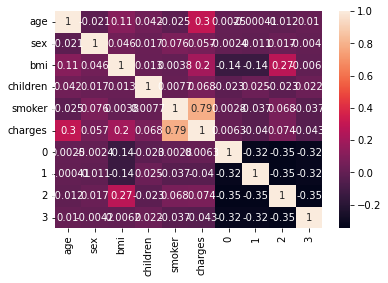

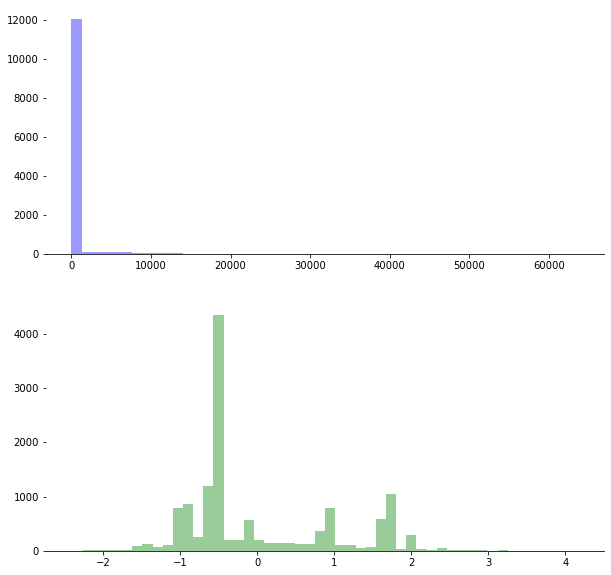

In [3]:
############### Read in the data ################
df = pd.read_csv("insurance.csv", header='infer')

############### EDA ################
df.head()
#df.info()
#df.describe()

############### Preprocessing ################

# --- Missing data handling ---- 
df.isnull().sum().sum()
# There is no missing data

# --- Encoding ----
'''
for 'sex' and 'smoker' column we will apply Label Encoding as there are only 2 catagories
for 'region' we will apply OneHot Encoding as there are more than 2 catagories
''' 
# Label Encoding:
le = LabelEncoder()
df.iloc[:, 1] = le.fit_transform(df.iloc[:, 1])
df.iloc[:, 4] = le.fit_transform(df.iloc[:, 4])
df.head()

# OneHot Encoding:
encoder = OneHotEncoder(handle_unknown='ignore')
one_hot_encoder = pd.DataFrame(encoder.fit_transform(df[['region']]).toarray())

# Merge one-hot encoded columns back with original DataFrame
df = df.join(one_hot_encoder)

# Drop the resgion categorical feature
df = df.drop(['region'], axis=1)

# Show Correlation Between Features 
Correlation = sns.heatmap(df.corr(), annot=True)
print("Correlation Between Features:\n", Correlation, "\n")

# Check Distribution of our Data
Distribution_Check = df['charges'].describe()
print("Distribution of our Data:\n", Distribution_Check, "\n")

# Compare Data Distribution Before and After Normalization
f, axes = plt.subplots(2, 1, figsize=(10, 10), sharex=False)
sns.despine(left=True)
sns.distplot(df, kde=False, color="b", ax=axes[0])

# --- Feature Scalling ---
scaler = StandardScaler()
scaler.fit(df)
df = pd.DataFrame(scaler.transform(df), columns=df.columns)
sns.distplot(df, kde=False, color="g", ax=axes[1])

# --- Splitting Data ---
X = df.drop(columns = ['charges'], axis=1).values
y = df['charges'].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


############### Modelling ################


# --- SVR model ---
SVR = SVR()
SVR.fit(X_train, y_train)

# --- SVR model evaluation ---
y_pred = SVR.predict(X_test)

R1 = r2_score(y_test,y_pred)
MSE1 = mean_squared_error(y_test, y_pred)
Accuracy1 = SVR.score(X_train, y_train)

print("Mean Squared Error of SVR Model:", MSE1)
print("R^2 Score of SVR Mode", R1)
print("Accuracy of SVR Model=" + str(Accuracy1), "\n")

dictionary = {
    "R1": R1,
    "MSE": MSE1,
    "Accuracy": Accuracy1,
}
 
with open("summary.json", "w") as outfile:
    json.dump(dictionary, outfile)

# --- Ridge model ---
Ridge = Ridge(alpha=1)
Ridge.fit(X_train, y_train)
y_pred2 = Ridge.predict(X_test)

# --- Ridge model evaluation ---
MSE2 = mean_squared_error(y_test, y_pred2)
R2 = r2_score(y_test, y_pred2)
Accuracy2 = Ridge.score(X_train, y_train)

print("Mean Squared Error of Ridge Model=", MSE2)
print("R^2 Score of Ridge Model=", R2)
print("Accuracy of Ridge Model=" + str(Accuracy2), "\n")

# --- Lasso model ---
Lasso = Lasso(alpha=0.2)
Lasso.fit(X_train, y_train)
y_pred3 = Lasso.predict(X_test)

# --- Lasso model evaluation ---
MSE3 = mean_squared_error(y_test, y_pred3)
R3 = r2_score(y_test, y_pred3)
Accuracy3 = Lasso.score(X_train, y_train)

print("Mean Squared Error of Lasso Model=", MSE3)
print("R^2 Score of Lasso Model=", R3)
print("Accuracy of Lasso Model=" + str(Accuracy3), "\n")


# ---  Ensembling ---

GBR = GradientBoostingRegressor(n_estimators=3, max_depth=3, learning_rate=0.2, criterion='mse', random_state=1)
GBR.fit(X_train, y_train)
y_pred4 = GBR.predict(X_test)


# ---  Ensembling evaluation ---

MSE4 = mean_squared_error(y_test, y_pred4)
R4 = r2_score(y_test, y_pred4)
Accuracy4 = GBR.score(X_train, y_train)

print("Mean Squared Error of Gradient Boosting Regressor=", MSE4)
print("R^2 Score of Gradient Boosting Regressor=", R4)
print("Accuracy of Gradient Boosting Regressor=" + str(Accuracy4), "\n")

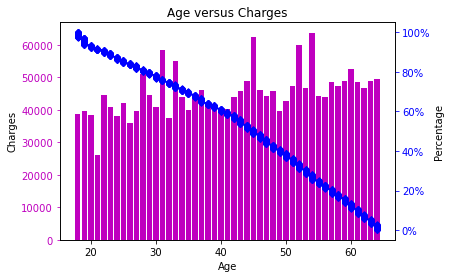

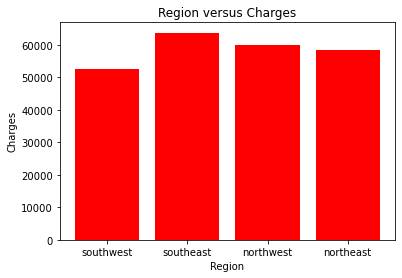

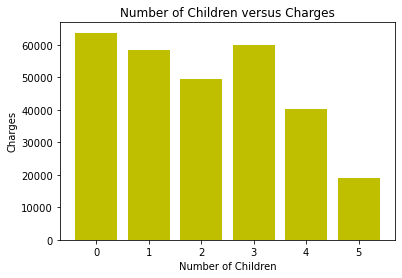

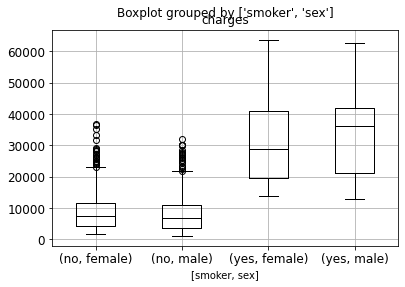

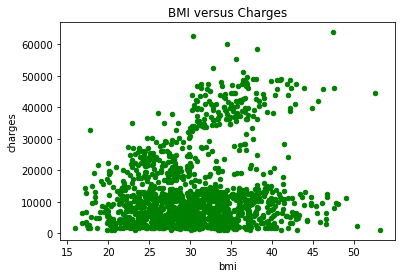

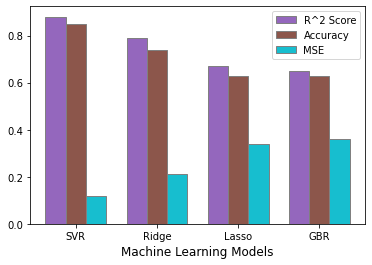

In [4]:
############### Plotting ################


#  Read in the Data
df = pd.read_csv("insurance.csv", header='infer')

# Create DataFrame
df1 = pd.DataFrame({'charges': df['charges']})
df1.index = df['age']

# Sort DataFrame by charges descending
df1 = df1.sort_values(by='age', ascending=False)

# Add column to display cumulative percentage
df1['cumperc'] = df1['charges'].cumsum()/df1['charges'].sum()*100

#create basic bar plot
fig, ax = plt.subplots()
ax.bar(df1.index, df1['charges'], color="m")

#add cumulative percentage line to plot
ax2 = ax.twinx()
ax2.plot(df1.index, df1['cumperc'], color="b", marker="D", ms=4)
ax2.yaxis.set_major_formatter(PercentFormatter())

#Specify axis colors
ax.tick_params(axis="y", colors="m")
ax2.tick_params(axis="y", colors="b")
ax.set_xlabel('Age',  loc='center')
ax.set_ylabel('Charges')
ax2.set_ylabel('Percentage')
plt.title('Age versus Charges')

# Create bar plot of region versus charges
df3 = df['charges']
df3.index = df['region']
fig2, ax3 = plt.subplots()
ax3.bar(df3.index, df3, color='r')
ax3.set_xlabel('Region',  loc='center')
ax3.set_ylabel('Charges')
plt.title('Region versus Charges')

# Create bar plot of number of children versus charges
df4 = df['charges']
fig3, ax4 = plt.subplots()
df4.index = df['children']
ax4.bar(df4.index, df3, color='y')
ax4.set_xlabel('Number of Children',  loc='center')
ax4.set_ylabel('Charges')
plt.title('Number of Children versus Charges')

# Create box plot of smokers and gender type versus charges
df.boxplot(by =['smoker', 'sex'], column =['charges'], grid = True, fontsize=12, color='k')

# Create scatter plot of BMI versus charges
df.plot.scatter(x = 'bmi', y = 'charges', color='g')
plt.title('BMI versus Charges')

# Create bar plot to evaluate the models

# Create image
barWidth = 0.25
fig4 = plt.subplots()
 
# set height of bar
Rs = [0.88, 0.79, 0.67, 0.65]
Accu = [0.85, 0.74, 0.63, 0.63]
MSEs = [0.12, 0.21, 0.34, 0.36]
 
# Set position of bar on X axis
br1 = np.arange(len(Rs))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
 
# Make the plot
plt.bar(br1, Rs, color ='C4', width = barWidth, edgecolor ='grey', label ='R^2 Score')
plt.bar(br2, Accu, color ='C5', width = barWidth, edgecolor ='grey', label ='Accuracy')
plt.bar(br3, MSEs, color ='C9', width = barWidth, edgecolor ='grey', label ='MSE')
 
# Adding Xticks
plt.xlabel('Machine Learning Models', fontsize = 12)
plt.xticks([r + barWidth for r in range(len(Rs))], ['SVR', 'Ridge', 'Lasso', 'GBR'])

# Display charts
plt.legend()
plt.show()